In [208]:
# Generating a toy dataset.
# DO NOT MODIFY THIS PART
import numpy as np
import math
import random as rand

paras = list((rand.random() - 0.5 for _ in range(13)))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def y_gen(x):
    h_11 = sigmoid(paras[0] * x[0] + paras[1] * x[1] + paras[2])
    h_12 = sigmoid(paras[3] * x[0] + paras[4] * x[1] + paras[5])
    h_13 = sigmoid(paras[6] * x[0] + paras[7] * x[1] + paras[8])
    h_21 = sigmoid(paras[9] * h_11 + paras[10] * h_12 + paras[11] * h_13 + paras[12])
    return h_21 + ((rand.random()-0.5)/100 if rand.random()>0.6 else 0)

n = 300
x = list(zip((rand.random() - 0.5 for _ in range(n)), (rand.random() - 0.5 for _ in range(n))))
y = list(map(y_gen, x))
y = [(i-min(y))/(max(y)-min(y)) for i in y]

#part a
from sklearn.model_selection import train_test_split

r = 0.2
x_train_valid, x_test, y_train_valid, y_test = train_test_split(x, y, test_size=r)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_valid, y_train_valid, test_size=r)

In [209]:
#part b
import matplotlib.pyplot as plt

def gradient(x):
    return sigmoid(x) * (1 - sigmoid(x))

def getLoss(y, yPred):
    return np.mean(0.5 * (y- yPred) ** 2)

#part c
class NN:
    def __init__(self):
        # Initialize parameters and biases
        self.w1 = np.random.uniform(-1, 1, size = (2, 3))  # Layer 1 weights
        self.b1 = np.array([1, 1, 1], dtype = float)
        self.w2 = np.random.uniform(-1, 1, size = (3, 1))  # Layer 2 weights
        self.b2 = np.array([1], dtype = float)  # Layer 2 biases

    def forward(self, x):
        # Forward propagation
        self.h0 = np.dot(x, self.w1) + self.b1
        self.a1 = sigmoid(self.h0)
        self.h1 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = sigmoid(self.h1)
        return self.a2

    def backward(self, x, y, yPred, learning_rate):
        x = np.array(x)
        loss = yPred - y
        dh2 = loss * gradient(self.h1)
        dw2 = np.dot(self.a1.T, dh2)
        db2 = np.sum(dh2)
        da1 = np.dot(dh2, self.w2.T)
        dh1 = da1 * gradient(self.h0)
        dw1 = np.dot(x.T, dh1)
        db1 = np.sum(dh1)
        self.w1 -= learning_rate * dw1
        self.b1 -= learning_rate * db1
        self.w2 -= learning_rate * dw2
        self.b2 -= learning_rate * db2

    #part d
    def train(self, x_train, y_train, x_valid, y_valid, epochs, learning_rate):
        # Lists to store training and validation costs
        trainCosts = []
        validCosts = []

        #part e
        for epoch in range(epochs):
            yPred = self.forward(x_train)
            loss = getLoss(y_train, yPred)
            trainCosts.append(loss)

            self.backward(x_train, y_train, yPred, learning_rate)
            yTrue = self.forward(x_valid)
            trueLoss = getLoss(y_valid, yTrue)
            validCosts.append(trueLoss)

            print(f"Epoch: {epoch + 1}, Train Loss: {loss}, Valid Loss: {trueLoss}")
        plt.plot(range(len(trainCosts)), trainCosts, label='Training Loss')
        plt.plot(range(len(validCosts)), validCosts, label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()
        plt.show()
        # return trainCosts, validCosts

In [210]:
def findRate(x_train, y_train, x_valid, y_valid, epochs):
    learningRates = np.logspace(-3, np.log10(0.009), num = 250)
    
    learningRateDict = {}

    for lr in learningRates:
        model = NN()
        trainCosts = []
        validCosts = []

        #part e
        for _ in range(epochs):
            yPred = model.forward(x_train)
            loss = getLoss(y_train, yPred)
            trainCosts.append(loss)

            model.backward(x_train, y_train, yPred, lr)
            yTrue = model.forward(x_valid)
            trueLoss = getLoss(y_valid, yTrue)
            validCosts.append(trueLoss)
        print(f"Learning Rate {lr}, Train Loss: {loss}, Valid Loss: {trueLoss}")
        # Store the validation costs for this learning rate
        learningRateDict[lr] = validCosts[-1]  # Only store the final validation cost
    
    # Find the optimal learning rate based on the lowest validation cost
    rate = min(learningRateDict, key = learningRateDict.get)
    
    return rate

Epoch: 1, Train Loss: 0.0761567013436963, Valid Loss: 0.08119345105579708
Epoch: 2, Train Loss: 0.06924178771260804, Valid Loss: 0.0728386337371861
Epoch: 3, Train Loss: 0.06197652384352712, Valid Loss: 0.06426457429360567
Epoch: 4, Train Loss: 0.05460131642774824, Valid Loss: 0.055805099279575915
Epoch: 5, Train Loss: 0.04742549358259667, Valid Loss: 0.04782875718772652
Epoch: 6, Train Loss: 0.04077911363922811, Valid Loss: 0.04066504471178342
Epoch: 7, Train Loss: 0.034943565542645716, Valid Loss: 0.034534053435778665
Epoch: 8, Train Loss: 0.03008944405539186, Valid Loss: 0.029512366858992906
Epoch: 9, Train Loss: 0.026251503300092887, Valid Loss: 0.02554697616209085
Epoch: 10, Train Loss: 0.0233487432377555, Valid Loss: 0.022501082899357306
Epoch: 11, Train Loss: 0.02123165570708574, Valid Loss: 0.020204719212302474
Epoch: 12, Train Loss: 0.01973038906405103, Valid Loss: 0.018491818526713555
Epoch: 13, Train Loss: 0.01868763830921939, Valid Loss: 0.01721949968688197
Epoch: 14, Train

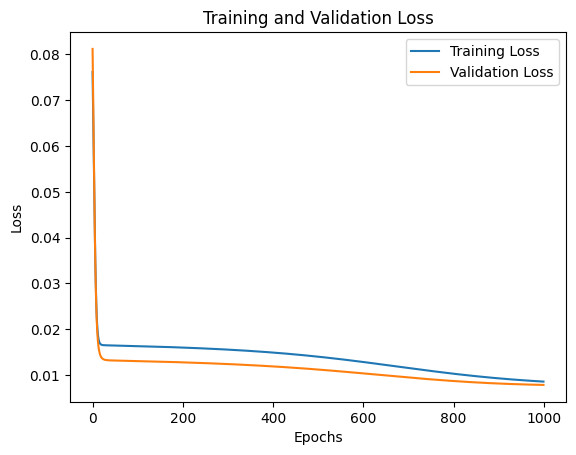

In [225]:
# Initialize the neural network
model = NN()
y_train = np.reshape(y_train, (-1, 1))
y_valid = np.reshape(y_valid, (-1, 1))
model.train(x_train, y_train, x_valid, y_valid, 1000, 0.006)

In [226]:
rate = findRate(x_train, y_train, x_valid, y_valid, 200)
print(rate)

Learning Rate 0.001, Train Loss: 0.017792320488531164, Valid Loss: 0.01463251627809808
Learning Rate 0.001008863243070352, Train Loss: 0.01668798968202267, Valid Loss: 0.013877221502054225
Learning Rate 0.0010178050432184285, Train Loss: 0.015539926319371426, Valid Loss: 0.012514560367622524
Learning Rate 0.0010268260967147027, Train Loss: 0.017205347084217074, Valid Loss: 0.013898850071705096
Learning Rate 0.001035927106000866, Train Loss: 0.014345417261981625, Valid Loss: 0.01173747754410343
Learning Rate 0.0010451087797445182, Train Loss: 0.017050456642656687, Valid Loss: 0.013697804334593755
Learning Rate 0.001054371832894353, Train Loss: 0.014939362624476935, Valid Loss: 0.012106760751184406
Learning Rate 0.0010637169867358273, Train Loss: 0.015488421345781189, Valid Loss: 0.012737780264120766
Learning Rate 0.0010731449689473295, Train Loss: 0.015313436026400397, Valid Loss: 0.012658302104073706
Learning Rate 0.0010826565136568351, Train Loss: 0.017592494877762658, Valid Loss: 0.0

Epoch: 1, Train Loss: 0.09354924063681025, Valid Loss: 0.1001742597392295
Epoch: 2, Train Loss: 0.08593001496068087, Valid Loss: 0.09021094012450469
Epoch: 3, Train Loss: 0.07712704102070123, Valid Loss: 0.07897611998714975
Epoch: 4, Train Loss: 0.06729682856742292, Valid Loss: 0.06692218593058759
Epoch: 5, Train Loss: 0.056893132190411144, Valid Loss: 0.05487305413780876
Epoch: 6, Train Loss: 0.046692961932697064, Valid Loss: 0.04386175000856485
Epoch: 7, Train Loss: 0.03762314987398868, Valid Loss: 0.03475010321972694
Epoch: 8, Train Loss: 0.030399924561513192, Valid Loss: 0.027886902416436567
Epoch: 9, Train Loss: 0.025236603060539552, Valid Loss: 0.02308823115035481
Epoch: 10, Train Loss: 0.021868641491924145, Valid Loss: 0.01988973653339321
Epoch: 11, Train Loss: 0.019814859614578795, Valid Loss: 0.017805324793847277
Epoch: 12, Train Loss: 0.018615698710197956, Valid Loss: 0.016451503364182572
Epoch: 13, Train Loss: 0.017932189203363574, Valid Loss: 0.015564274287589339
Epoch: 14,

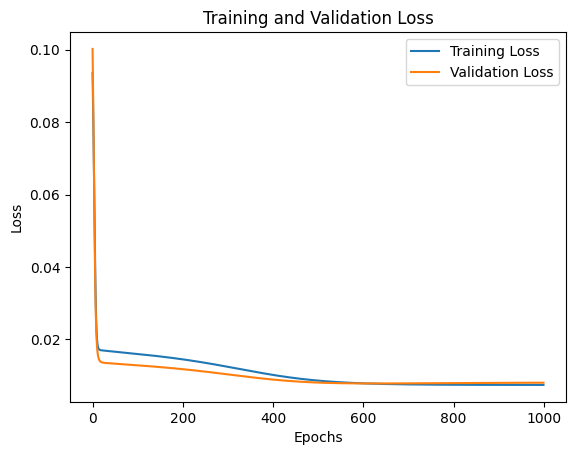

In [227]:
new = NN()
new.train(x_train, y_train, x_valid, y_valid, 1000, rate)

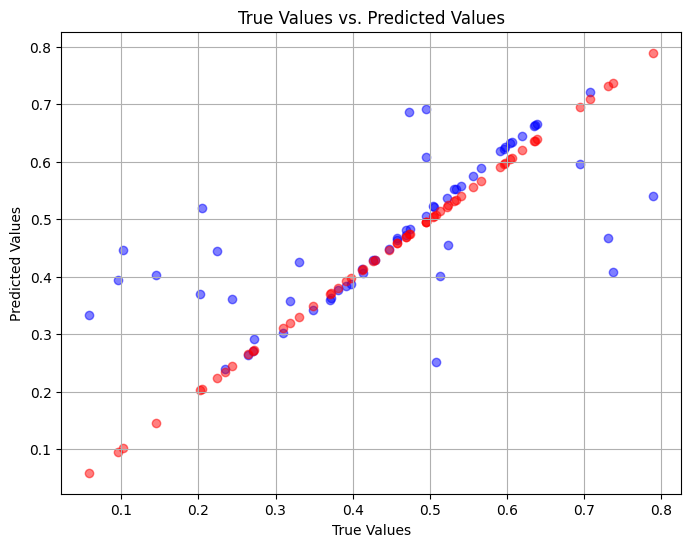

In [228]:
yPred = new.forward(x_test)
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, yPred, color='blue', alpha=0.5, label='Predicted Values')
plt.scatter(y_test, y_test, color='red', alpha=0.5, label='True Values')
plt.title('True Values vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()
